# Adapted from: https://github.com/sooshie/Security-Data-Analysis
# Introduction
With this lab data grouping and graphing will be explored. There is always a great deal of information you can gather by grouping and comparing various columns within a dataframe. In addition for data summarization graphing is an important tool to have.

HTTP data will be used for this exercise. The data was generated from various PCAPs that have been collected that contain both legitimate traffic as well as traffic relating to exploit kits. While no malicious traffic is contained within the log file there are malicious domains and URLS (it's recommened you don't visit them). While this traffic was generated by running Bro over a series of PCAPS, similar data can be obtained from various Web Proxies, this is a nice cross over example of what is possible with your own data.

Some goals will be understand when the data was generated, what systems generated,high-level stats about the traffic, and the types of data transferred within the connections.
# Log file link
http://www.secrepo.com/Security-Data-Analysis/Lab_2/
___

# Imports

In [1]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

# File Input
Using what you learned in the last lab cread in the log (csv) file provided for you.

* The file name is in the current directory and is called *http.log*
* There is no header to the file
* It's *[TAB]* seperated
* The fields are: 'ts', 'uid', 'id.orig_h', 'id.orig_p', 'id.resp_h', 'id.resp_p', 'trans_depth', 'method', 'host', 'uri', 'referrer', 'user_agent', 'request_body_len', 'response_body_len', 'status_code', 'status_msg', 'info_code', 'info_msg', 'filename', 'tags', 'username', 'password', 'proxied', 'orig_fuids', 'orig_mime_types', 'resp_fuids', 'resp_mime_types', 'sample'

In [2]:
http_df = pd.read_csv("data/http.log", header=None, sep="\t", names=['ts', 'uid', 'id.orig_h', 'id.orig_p', 'id.resp_h', 'id.resp_p', 'trans_depth', 'method', 'host', 'uri', 'referrer', 'user_agent', 'request_body_len', 'response_body_len', 'status_code', 'status_msg', 'info_code', 'info_msg', 'filename', 'tags', 'username', 'password', 'proxied', 'orig_fuids', 'orig_mime_types', 'resp_fuids', 'resp_mime_types', 'sample'])
http_df.head()

,ts,uid,id.orig_h,id.orig_p,id.resp_h,id.resp_p,trans_depth,method,host,uri,...,filename,tags,username,password,proxied,orig_fuids,orig_mime_types,resp_fuids,resp_mime_types,sample
0,1.338423e+09,ChBJ7L2l1Vcl8PmMxh,192.168.88.10,1030,188.121.46.128,80,1,GET,myfecm.com,/,...,-,(empty),-,-,-,-,-,FmrItE3tE6uWAdmZV,text/html,NaN
1,1.338423e+09,CKH7Eu1pUtdXF8KKq8,192.168.88.10,1031,50.28.53.156,80,1,GET,www.daysofyorr.com,/release.js,...,-,(empty),-,-,-,-,-,FyKJaS1eo05A7BfpRj,text/plain,NaN
2,1.338423e+09,CMjfL821GNMgnPFTa9,192.168.88.10,1034,188.72.248.160,80,1,GET,potialosce.tk,/25433658.html,...,-,(empty),-,-,-,-,-,FzLBH53sLcK6bEiRai,text/html,NaN
3,1.338423e+09,Ckt4Bw4pZVSaU17gSg,192.168.88.10,1035,69.63.148.95,80,1,GET,www.12secondcommute.com,/common/formValidation.js,...,-,(empty),-,-,-,-,-,F6UaIl1po975GOkGJh,text/plain,NaN
4,1.338423e+09,ChBJ7L2l1Vcl8PmMxh,192.168.88.10,1030,188.121.46.128,80,2,GET,myfecm.com,/button_bg6.jpg,...,-,(empty),-,-,-,-,-,FjxdXz2z8deZMyEdvb,image/jpeg,NaN


# Clean-up the timestamp
Now that you've got the data imported, cleanup up the timestamp column *ts*. Don't forget to re-assign back to the *ts* column.

In [3]:
http_df['ts'] = pd.to_datetime(http_df['ts'], unit='s')
http_df.head()

,ts,uid,id.orig_h,id.orig_p,id.resp_h,id.resp_p,trans_depth,method,host,uri,...,filename,tags,username,password,proxied,orig_fuids,orig_mime_types,resp_fuids,resp_mime_types,sample
0,2012-05-31 00:09:27.177342976,ChBJ7L2l1Vcl8PmMxh,192.168.88.10,1030,188.121.46.128,80,1,GET,myfecm.com,/,...,-,(empty),-,-,-,-,-,FmrItE3tE6uWAdmZV,text/html,NaN
1,2012-05-31 00:09:28.343725056,CKH7Eu1pUtdXF8KKq8,192.168.88.10,1031,50.28.53.156,80,1,GET,www.daysofyorr.com,/release.js,...,-,(empty),-,-,-,-,-,FyKJaS1eo05A7BfpRj,text/plain,NaN
2,2012-05-31 00:09:29.124169984,CMjfL821GNMgnPFTa9,192.168.88.10,1034,188.72.248.160,80,1,GET,potialosce.tk,/25433658.html,...,-,(empty),-,-,-,-,-,FzLBH53sLcK6bEiRai,text/html,NaN
3,2012-05-31 00:09:29.142868992,Ckt4Bw4pZVSaU17gSg,192.168.88.10,1035,69.63.148.95,80,1,GET,www.12secondcommute.com,/common/formValidation.js,...,-,(empty),-,-,-,-,-,F6UaIl1po975GOkGJh,text/plain,NaN
4,2012-05-31 00:09:29.602004992,ChBJ7L2l1Vcl8PmMxh,192.168.88.10,1030,188.121.46.128,80,2,GET,myfecm.com,/button_bg6.jpg,...,-,(empty),-,-,-,-,-,FjxdXz2z8deZMyEdvb,image/jpeg,NaN


In the next cell the timestamp column is set to be the new index of the dataframe. By default dataframes are indexed by the row number, and by indexing by timestamp it's easier to perform various types of time series analysis. After the assignment a quick **head()** is performed, and in the output you'll see that the *ts* has moved "down and to the left". The new location of the *ts* heading indicates that it is now the index, and has replaced the default.

In [4]:
http_df = http_df.set_index('ts')
http_df.head()

,uid,id.orig_h,id.orig_p,id.resp_h,id.resp_p,trans_depth,method,host,uri,referrer,...,filename,tags,username,password,proxied,orig_fuids,orig_mime_types,resp_fuids,resp_mime_types,sample
ts,,,,,,,,,,,,,,,,,,,,,
2012-05-31 00:09:27.177342976,ChBJ7L2l1Vcl8PmMxh,192.168.88.10,1030,188.121.46.128,80,1,GET,myfecm.com,/,-,...,-,(empty),-,-,-,-,-,FmrItE3tE6uWAdmZV,text/html,NaN
2012-05-31 00:09:28.343725056,CKH7Eu1pUtdXF8KKq8,192.168.88.10,1031,50.28.53.156,80,1,GET,www.daysofyorr.com,/release.js,http://myfecm.com/,...,-,(empty),-,-,-,-,-,FyKJaS1eo05A7BfpRj,text/plain,NaN
2012-05-31 00:09:29.124169984,CMjfL821GNMgnPFTa9,192.168.88.10,1034,188.72.248.160,80,1,GET,potialosce.tk,/25433658.html,http://myfecm.com/,...,-,(empty),-,-,-,-,-,FzLBH53sLcK6bEiRai,text/html,NaN
2012-05-31 00:09:29.142868992,Ckt4Bw4pZVSaU17gSg,192.168.88.10,1035,69.63.148.95,80,1,GET,www.12secondcommute.com,/common/formValidation.js,http://myfecm.com/,...,-,(empty),-,-,-,-,-,F6UaIl1po975GOkGJh,text/plain,NaN
2012-05-31 00:09:29.602004992,ChBJ7L2l1Vcl8PmMxh,192.168.88.10,1030,188.121.46.128,80,2,GET,myfecm.com,/button_bg6.jpg,http://myfecm.com/,...,-,(empty),-,-,-,-,-,FjxdXz2z8deZMyEdvb,image/jpeg,NaN


# Selecting Based on Index Values
With the default indexing in dataframes you can select elements or [slices](https://www.geeksforgeeks.org/python-list-slicing/) of elements based on numbers (similarly to how lists work in Python). With a time indexed dataframe various parts of dates, or whole dates, can be used to select rows.

A year can be used eg: 2012, a year and month '2012-02' or a year, month and day '2012-02-20'.

In [5]:
http_df = http_df.sort_index()
http_df['2012-02-20':'2012-02-23'].head()

,uid,id.orig_h,id.orig_p,id.resp_h,id.resp_p,trans_depth,method,host,uri,referrer,...,filename,tags,username,password,proxied,orig_fuids,orig_mime_types,resp_fuids,resp_mime_types,sample
ts,,,,,,,,,,,,,,,,,,,,,
2012-02-20 18:24:27.066481152,CRG8No3eTFcMpdvNEc,192.168.21.10,1030,75.119.192.75,80,1,GET,fall-line.com,/,-,...,-,(empty),-,-,-,-,-,Fkqwd92QgoaDrn1LJ5,text/html,NaN
2012-02-20 18:24:28.170341120,COdK1c3ZDqgMaUWna8,192.168.21.10,1033,74.125.159.95,80,1,GET,fonts.googleapis.com,/css?family=Lobster,http://fall-line.com/,...,-,(empty),-,-,-,-,-,FoZoki2hntIm6TDSj7,text/plain,NaN
2012-02-20 18:24:28.170551040,CfjCrN1gZWKN7fzfJj,192.168.21.10,1032,74.125.159.95,80,1,GET,fonts.googleapis.com,"/css?family=Droid+Sans:regular,bold",http://fall-line.com/,...,-,(empty),-,-,-,-,-,FuJzh73vR0wq7itVqi,text/plain,NaN
2012-02-20 18:24:28.214336000,Cp6F8Y3FKqf3Wk1Uy3,192.168.21.10,1031,75.119.192.75,80,1,GET,fall-line.com,/wp-content/themes/Feather/style.css,http://fall-line.com/,...,-,(empty),-,-,-,-,-,FDiQY619mz3suxj7g9,text/plain,NaN
2012-02-20 18:24:28.317739008,CRG8No3eTFcMpdvNEc,192.168.21.10,1030,75.119.192.75,80,2,GET,fall-line.com,/wp-content/themes/Feather/css/colorpicker.css,http://fall-line.com/,...,-,(empty),-,-,-,-,-,FAvttI3wiiFcWaG72,text/plain,NaN


# Time Resampling
Time indexed information can be resampled and summarized.

Below is a resampling on day *D* that will count up the number of occurences per day. Try various date selections to get a feel for how the sampling works and how it can be used to summarize data.

In [6]:
http_df['2012-02-20':'2012-02-23'].resample("D").count().head() #.resample("D", how='count').head()

,uid,id.orig_h,id.orig_p,id.resp_h,id.resp_p,trans_depth,method,host,uri,referrer,...,filename,tags,username,password,proxied,orig_fuids,orig_mime_types,resp_fuids,resp_mime_types,sample
ts,,,,,,,,,,,,,,,,,,,,,
2012-02-20,1581,1581,1581,1581,1581,1581,1581,1581,1581,1581,...,1581,1581,1581,1581,1581,1581,1581,1581,1581,0
2012-02-21,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,0
2012-02-22,2274,2274,2274,2274,2274,2274,2274,2274,2274,2274,...,2274,2274,2274,2274,2274,2274,2274,2274,2274,0
2012-02-23,818,818,818,818,818,818,818,818,818,818,...,818,818,818,818,818,818,818,818,818,0


Try the resample example from above with some of the other options for resample. Replace the *D* with some other values to get different frequencies.

| Alias | Description
| ------| -----------
| B | business day frequency
| C | custom business day frequency (experimental)
| D | calendar day frequency
| W | weekly frequency
| M | month end frequency
| BM | business month end frequency
| CBM | custom business month end frequency
| MS | month start frequency
| BMS | business month start frequency
| CBMS | custom business month start frequency
| Q | quarter end frequency
| BQ | business quarter endfrequency
| QS | quarter start frequency
| BQS | business quarter start frequency
| A | year end frequency
| BA | business year end frequency
| ASyear | start frequency
| BAS | business year start frequency
| H | hourly frequency
| T | minutely frequency
| S | secondly frequency
| L | milliseonds
| U | microseconds


In [7]:
http_df['2012-02-20':].resample("B").count().head() #.resample("D", how='count').head()

,uid,id.orig_h,id.orig_p,id.resp_h,id.resp_p,trans_depth,method,host,uri,referrer,...,filename,tags,username,password,proxied,orig_fuids,orig_mime_types,resp_fuids,resp_mime_types,sample
ts,,,,,,,,,,,,,,,,,,,,,
2012-02-20,1581,1581,1581,1581,1581,1581,1581,1581,1581,1581,...,1581,1581,1581,1581,1581,1581,1581,1581,1581,0
2012-02-21,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,0
2012-02-22,2274,2274,2274,2274,2274,2274,2274,2274,2274,2274,...,2274,2274,2274,2274,2274,2274,2274,2274,2274,0
2012-02-23,818,818,818,818,818,818,818,818,818,818,...,818,818,818,818,818,818,818,818,818,0
2012-02-24,3526,3526,3526,3526,3526,3526,3526,3526,3526,3526,...,3526,3526,3526,3526,3526,3526,3526,3526,3526,0


# Graphing Time Series Data
After getting a grasp on the various ways to look at time indexed data, it's useful to display it visually. With this section the same progression as above will be used.

The cell below will generate a time series graph of both the request and response bodies, summed up over their timestamps.

<Figure size 1152x360 with 0 Axes>

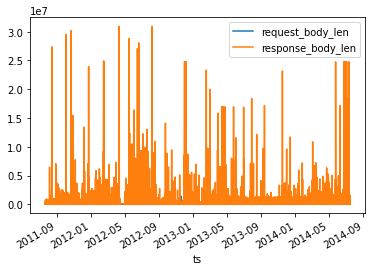

In [8]:
plt.figure(figsize=(16.0, 5.0))
df = http_df[['request_body_len','response_body_len']]
df.plot();

A small copy of the HTTP dataframe **http_df** is stored in **df** it only contains 2 columns *[request_body_len, response_body_len]*, this enables the comparision of the request and response body lengths.

Below is another way to graph the resampled data. In this case the data is resampled on *month*.

<AxesSubplot:xlabel='ts'>

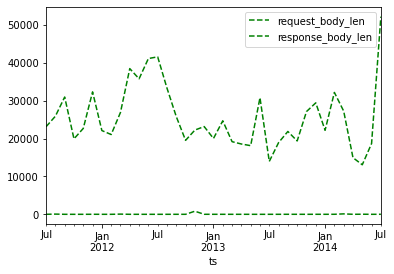

In [43]:
resamp = df.resample("M").mean()
resamp.plot(style='g--')

# Graphing Multiple Views (Time Series)
It's possible to graph muliple methods as well. This can help identify different patterns in the data.

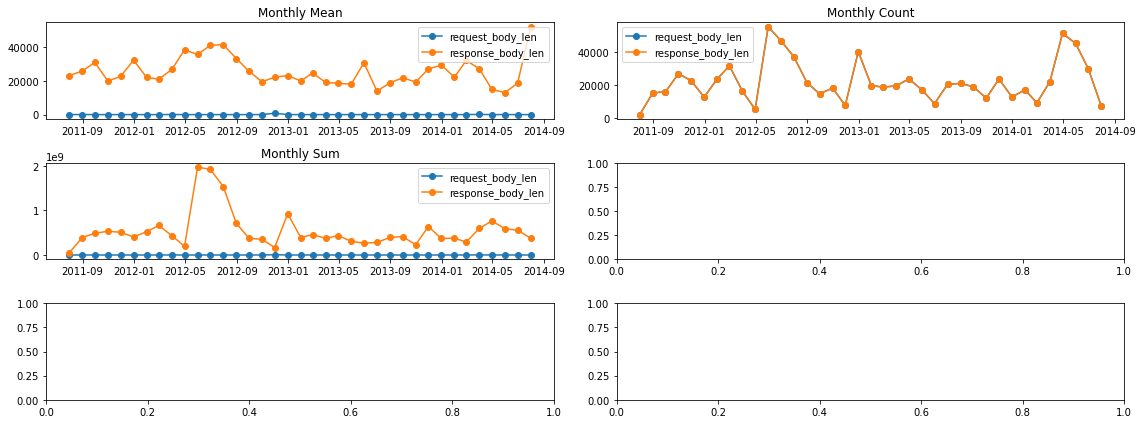

In [36]:
monthly_resampled = df.resample("M")

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(16, 6))

# Subplot
axes[0,0].plot(monthly_resampled.mean(), marker='o')
axes[0,0].set_title('Monthly Mean')
axes[0,0].legend(df.columns)

# Subplot
axes[0,1].plot(monthly_resampled.count(, marker='o')
axes[0,1].set_title('Monthly Count')
axes[0,1].legend(df.columns)

# Subplot
axes[1,0].plot(monthly_resampled.sum(), marker='o')
axes[1,0].set_title('Monthly Sum')
axes[1,0].legend(df.columns)

plt.tight_layout()

<function matplotlib.pyplot.show(close=None, block=None)>

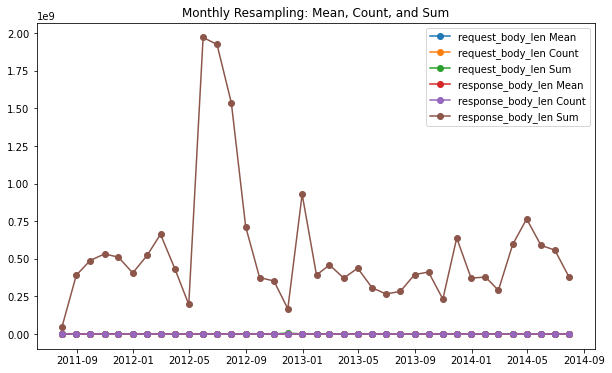

In [42]:
plt.figure(figsize=(10, 6))
for column in df.columns:
    plt.plot(monthly_resampled[column].mean(), label=f'{column} Mean',marker='o')
    plt.plot(monthly_resampled[column].count(), label=f'{column} Count',marker='o')
    plt.plot(monthly_resampled[column].sum(), label=f'{column} Sum',marker='o')

plt.title('Monthly Resampling: Mean, Count, and Sum')
plt.legend()
plt.show

Above, the response_body_len sum really sticks out in the bottom graph, but viewing the smaller graphs above it's possible to see that it's not because of an increase in the number of requests (it's simply because more information was received, in aggregate, over all the connections).

# Dataframe Grouping
Another useful way to look at data is how different groups of values look with one another. For this pandas offeres the **groupby()** command. It allows you to specify an arbitray list of columns in your dataframe that are evaluated left-to-right in terms of grouping.

The example below shows how *resp_mime_type* (filetype returned by the server) breaks down, and then per-filetype what *user_agents* requested those files. You can see the number of entries per-column per-value in the table.

In [44]:
http_df.groupby(['resp_mime_types','user_agent']).count()

uid  \
resp_mime_types user_agent                                                
-               (empty)                                             169   
                -                                                   582   
                ????1                                                 1   
                AYAgent.aye                                           1   
                B2BFB2BDDEC2B5B7C7B1C1A786819A9D94A8C4C5C7CBC4D...    7   
...                                                                 ...   
video/x-ms-asf  NSPlayer/9.0.0.3250 WMFSDK/9.0                        2   
                Windows-Media-Player/9.00.00.3250                     1   
video/x-msvideo Mozilla/4.0 (compatible; MSIE 6.0; Windows NT 5...    2   
                Windows-Media-Player/9.00.00.3250                     2   
                contype                                               1   

                                                                    id.orig_h  \
resp_mime_types user_agent                                                      
-               (empty)                                                   169   
                -                                                         582   
                ????1                                                       1   
                AYAgent.aye                                                 1   
                B2BFB2BDDEC2B5B7C7B1C1A786819A9D94A8C4C5C7CBC4D...          7   
...                                                                       ...   
video/x-ms-asf  NSPlayer/9.0.0.3250 WMFSDK/9.0                              2   
                Windows-Media-Player/9.00.00.3250                           1   
video/x-msvideo Mozilla/4.0 (compatible; MSIE 6.0; Windows NT 5...          2   
                Windows-Media-Player/9.00.00.3250                           2   
                contype                                                     1   

                                                                    id.orig_p  \
resp_mime_types user_agent                                                      
-               (empty)                                                   169   
                -                                                         582   
                ????1                                                       1   
                AYAgent.aye                                                 1   
                B2BFB2BDDEC2B5B7C7B1C1A786819A9D94A8C4C5C7CBC4D...          7   
...                                                                       ...   
video/x-ms-asf  NSPlayer/9.0.0.3250 WMFSDK/9.0                              2   
                Windows-Media-Player/9.00.00.3250                           1   
video/x-msvideo Mozilla/4.0 (compatible; MSIE 6.0; Windows NT 5...          2   
                Windows-Media-Player/9.00.00.3250                           2   
                contype                                                     1   

                                                                    id.resp_h  \
resp_mime_types user_agent                                                      
-               (empty)                                                   169   
                -                                                         582   
                ????1                                                       1   
                AYAgent.aye                                                 1   
                B2BFB2BDDEC2B5B7C7B1C1A786819A9D94A8C4C5C7CBC4D...          7   
...                                                                       ...   
video/x-ms-asf  NSPlayer/9.0.0.3250 WMFSDK/9.0                              2   
                Windows-Media-Player/9.00.00.3250                           1   
video/x-msvideo Mozilla/4.0 (compatible; MSIE 6.0; Windows NT 5...          2   
                Windows-Media-Player/9.00.00.3250                           2   
            

It's also possible to select rows (as learned in Lab 1) and then do a **groupby()** to look at various sub views of the data.

This looks at all rows associated with those 2 different *user_agent*s, and then shows how many entries are in the data per-user-agent per-filetype.

In [45]:
http_df[http_df['user_agent'].isin(
    ['Mozilla/4.0 (compatible; MSIE 6.0; Windows NT 5.1; SV1)',
     'Mozilla/4.0 (compatible; MSIE 8.0; Windows NT 5.1; Trident/4.0)'])].groupby(['resp_mime_types','user_agent']).count()

uid  \
resp_mime_types          user_agent                                                  
-                        Mozilla/4.0 (compatible; MSIE 6.0; Windows NT 5...  64458   
                         Mozilla/4.0 (compatible; MSIE 8.0; Windows NT 5...  45411   
application/msword       Mozilla/4.0 (compatible; MSIE 6.0; Windows NT 5...      1   
                         Mozilla/4.0 (compatible; MSIE 8.0; Windows NT 5...      1   
application/octet-stream Mozilla/4.0 (compatible; MSIE 6.0; Windows NT 5...    775   
...                                                                            ...   
video/mp4                Mozilla/4.0 (compatible; MSIE 8.0; Windows NT 5...     34   
video/x-flv              Mozilla/4.0 (compatible; MSIE 6.0; Windows NT 5...    170   
                         Mozilla/4.0 (compatible; MSIE 8.0; Windows NT 5...    116   
video/x-ms-asf           Mozilla/4.0 (compatible; MSIE 6.0; Windows NT 5...      1   
video/x-msvideo          Mozilla/4.0 (compatible; MSIE 6.0; Windows NT 5...      2   

                                                                             id.orig_h  \
resp_mime_types          user_agent                                                      
-                        Mozilla/4.0 (compatible; MSIE 6.0; Windows NT 5...      64458   
                         Mozilla/4.0 (compatible; MSIE 8.0; Windows NT 5...      45411   
application/msword       Mozilla/4.0 (compatible; MSIE 6.0; Windows NT 5...          1   
                         Mozilla/4.0 (compatible; MSIE 8.0; Windows NT 5...          1   
application/octet-stream Mozilla/4.0 (compatible; MSIE 6.0; Windows NT 5...        775   
...                                                                                ...   
video/mp4                Mozilla/4.0 (compatible; MSIE 8.0; Windows NT 5...         34   
video/x-flv              Mozilla/4.0 (compatible; MSIE 6.0; Windows NT 5...        170   
                         Mozilla/4.0 (compatible; MSIE 8.0; Windows NT 5...        116   
video/x-ms-asf           Mozilla/4.0 (compatible; MSIE 6.0; Windows NT 5...          1   
video/x-msvideo          Mozilla/4.0 (compatible; MSIE 6.0; Windows NT 5...          2   

                                                                             id.orig_p  \
resp_mime_types          user_agent                                                      
-                        Mozilla/4.0 (compatible; MSIE 6.0; Windows NT 5...      64458   
                         Mozilla/4.0 (compatible; MSIE 8.0; Windows NT 5...      45411   
application/msword       Mozilla/4.0 (compatible; MSIE 6.0; Windows NT 5...          1   
                         Mozilla/4.0 (compatible; MSIE 8.0; Windows NT 5...          1   
application/octet-stream Mozilla/4.0 (compatible; MSIE 6.0; Windows NT 5...        775   
...                                                                                ...   
video/mp4                Mozilla/4.0 (compatible; MSIE 8.0; Windows NT 5...         34   
video/x-flv              Mozilla/4.0 (compatible; MSIE 6.0; Windows NT 5...        170   
                         Mozilla/4.0 (compatible; MSIE 8.0; Windows NT 5...        116   
video/x-ms-asf           Mozilla/4.0 (compatible; MSIE 6.0; Windows NT 5...          1   
video/x-msvideo          Mozilla/4.0 (compatible; MSIE 6.0; Windows NT 5...          2   

                                                                             id.resp_h  \
resp_mime_types          user_agent                                                      
-                        Mozilla/4.0 (compatible; MSIE 6.0; Windows NT 5...      64458   
                         Mozilla/4.0 (compatible; MSIE 8.0; Windows NT 5...      45411   
application/msword       Mozilla/4.0 (compatible; MSIE 6.0; Windows NT 5...          1   
                         Mozilla/4.0 (compatible; MSIE 8.0; Windows NT 5...          1   
application/octet-stream Mozilla/4.0 (compatible; MSIE 6.0; Windows NT 5...   

Use the pre-defined filetypes below to come up with a couple of interesting views on the data that involve the **groupby()** function.

In [46]:
executable_types = set(['application/x-dosexec', 'application/octet-stream', 'binary', 'application/vnd.ms-cab-compressed'])
common_exploit_types = set(['application/x-java-applet','application/pdf','application/zip','application/jar','application/x-shockwave-flash'])

# Graphing Groupby Data
One advantage of the **groupby()** command is being able to graph the output to get another view into the data. One popular way to do this is via a bar graph.

In the next cell there are a couple of things going on. First, a column named *count* is created and every row in that column is assigned the value of 1. This creates a column that we can use pandas to sum on since it has a value of 1 for each row.

In the second line, the dataframe is grouped by *resp_mime_types* and then only the *count* column is viewed/returned from the **groupby()** command. The result is then passed to the **sum()** function, this causes the sum on the *count* column, which due to the trick above has a value of 1 for each row. Combined this gets the number of files in each filetype. The result is simply plotted with **plot()**.

Any surprising results? What could they possibly indicate?

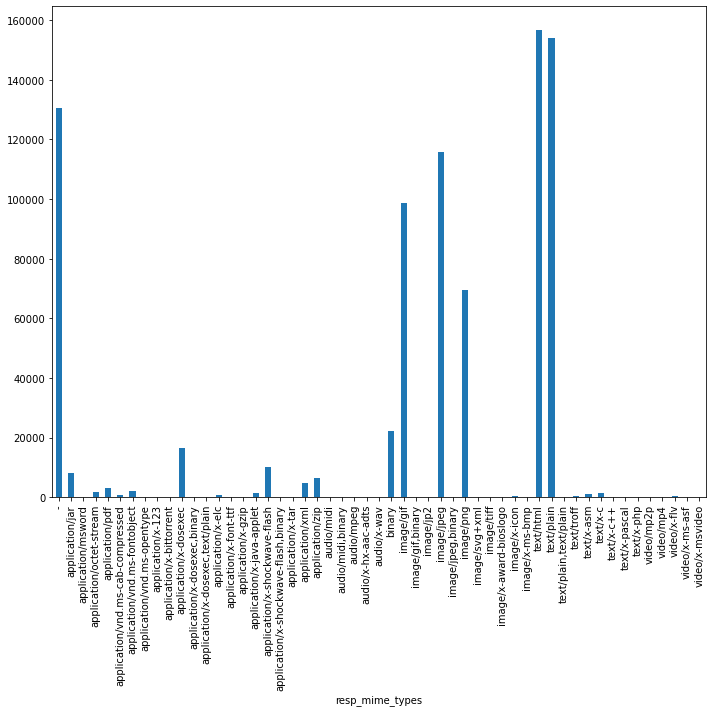

In [50]:
plt.figure(figsize=(10.0, 10.0))
http_df['count'] = 1
http_df.groupby('resp_mime_types')['count'].sum().plot(kind='bar')
plt.tight_layout()

The technique above can be used to look at the number of samples associated with each IP in dataset.

What kinds of conclusions can you draw based on the graph below?

<AxesSubplot:xlabel='id.orig_h'>

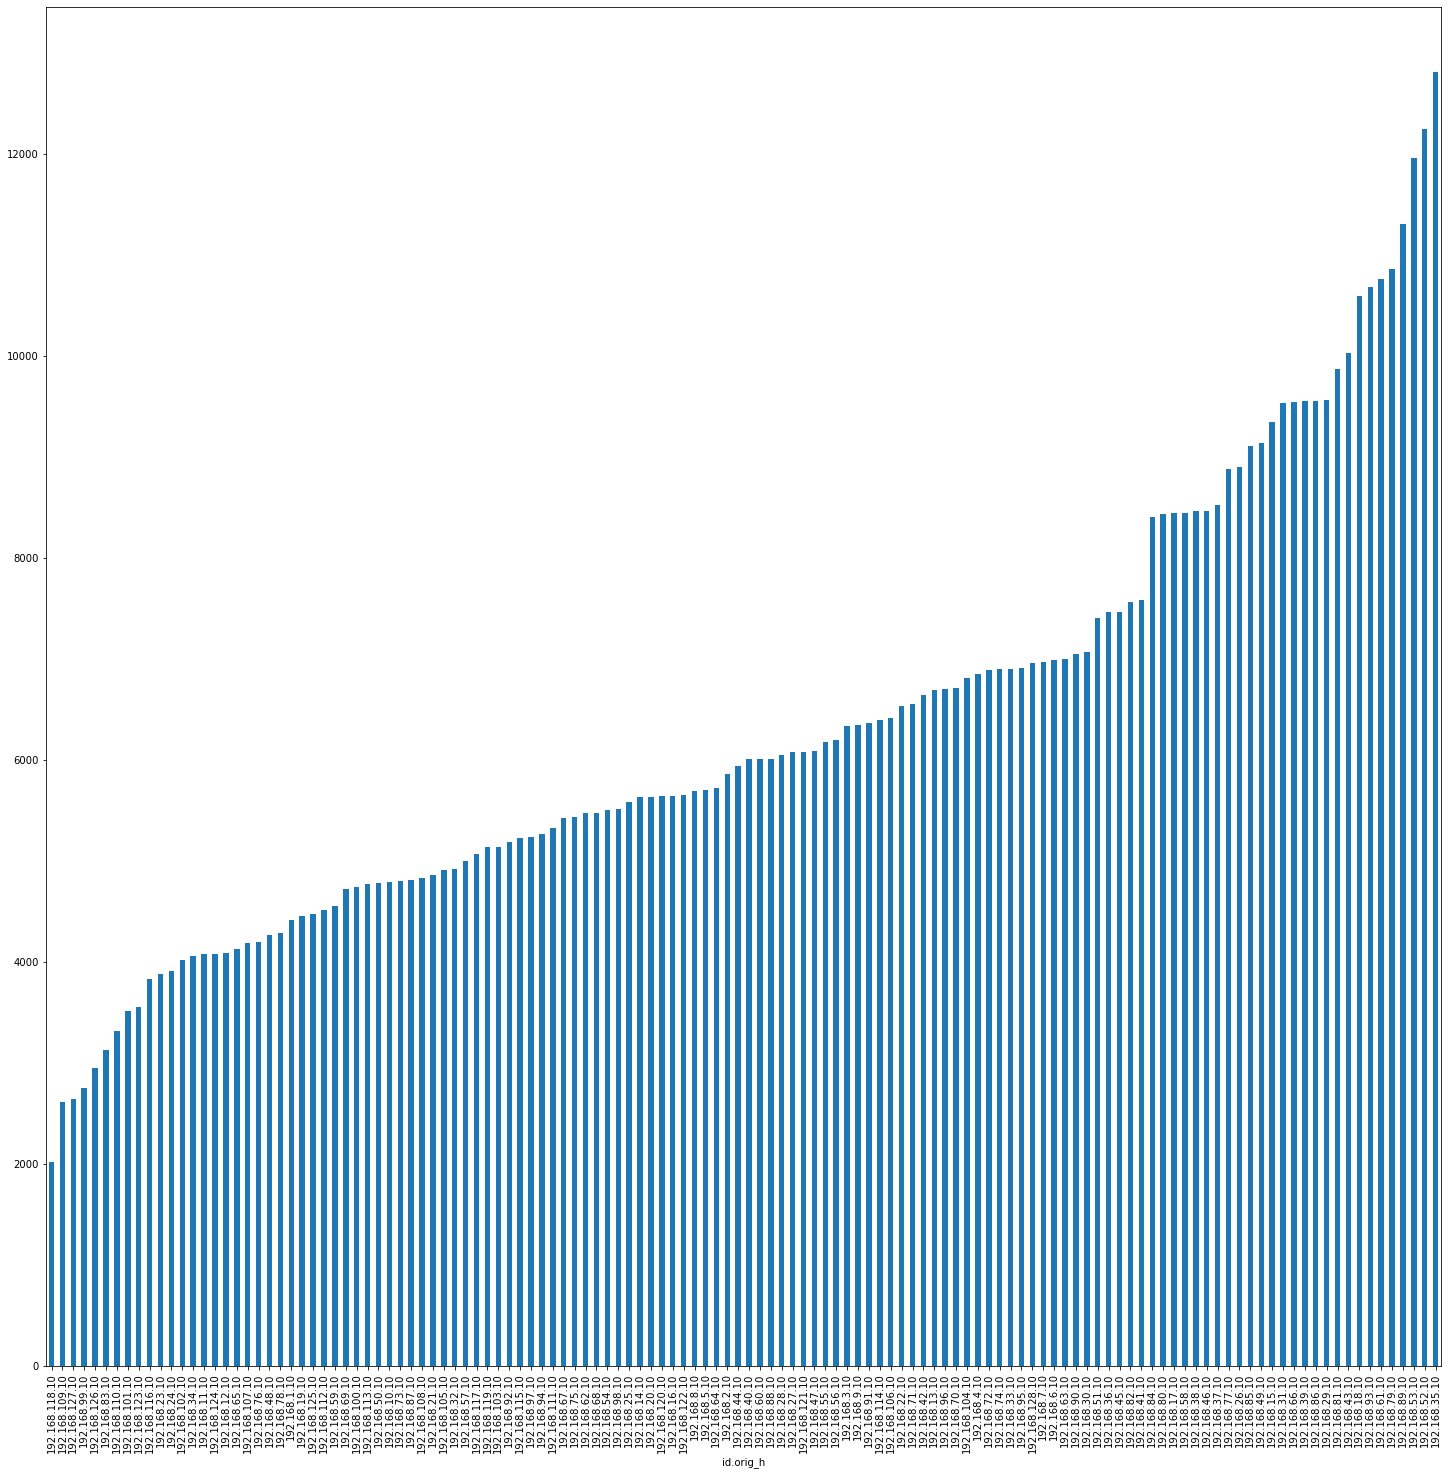

In [58]:
plt.figure(figsize=(25.0, 25.0))
http_df.groupby('id.orig_h')['count'].sum().sort_values().plot(kind='bar')

That's a lot of IP addresses! Bonus question: How many different source IP addresses are in the data set?

Remember above when we said you could access elements in a dataframe that weren't indexed by a timestamp like a regular Python array? Well, it's possible to do the same with dataframes produced by **groupby()**. By sliding around the dataset below what can you learn about the IP addresses that wasn't possible to see because of the resolution of the graph above?

<AxesSubplot:xlabel='id.orig_h'>

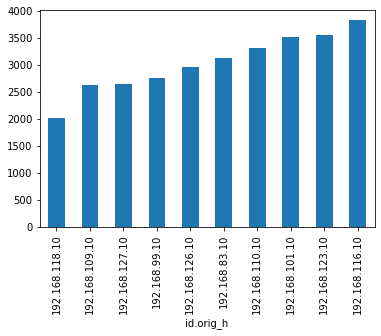

In [65]:
http_df.groupby('id.orig_h')['count'].sum().sort_values()[:10].plot(kind='bar')